In [125]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
%matplotlib inline

In [126]:
df = pd.read_csv("C:\\Users\\HP\\Data-Science\\week_6\\data\\FuelConsumption.csv")

In [127]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [128]:
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


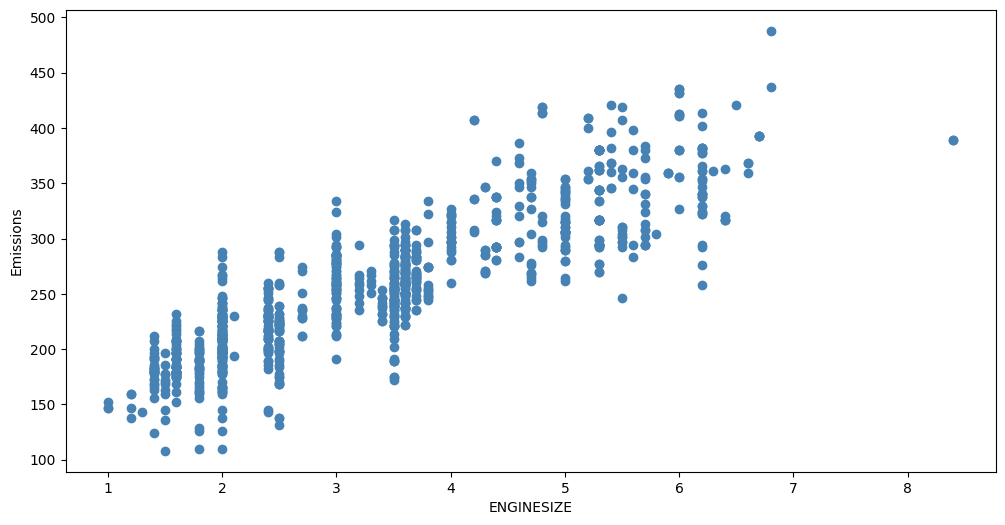

In [129]:
# non-linear regression yapılabilir Bir eğiklik olduğu için
# Başka yöntemlerle yine regression da yapıllabilir ki geçen sefer lineer regression yapmıştık
plt.rcParams['figure.figsize']=(12,6)
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="steelblue")
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

In [130]:
X_train, X_test, y_train, y_test=train_test_split(cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']],cdf['CO2EMISSIONS'], test_size=0.2)

- In polynomial regression, the  relationshio between the independent variable x and the dependent variable y is modeled a nth degree polynomial in x.
2nd degree:
y = B0 + B1*X + B2*X^2

For  example, the original feature set has only one feature

In [131]:
X_train = np.asanyarray(X_train[['ENGINESIZE']])
y_train = np.asanyarray(y_train)
X_test = np.asanyarray(X_test[['ENGINESIZE']])
y_test = np.asanyarray(y_test)

In [132]:
poly = PolynomialFeatures(degree=2)

In [133]:
train_x_poly = poly.fit_transform(X_train)

In [134]:
train_x_poly

array([[ 1.  ,  5.6 , 31.36],
       [ 1.  ,  3.7 , 13.69],
       [ 1.  ,  5.3 , 28.09],
       ...,
       [ 1.  ,  1.6 ,  2.56],
       [ 1.  ,  5.3 , 28.09],
       [ 1.  ,  1.6 ,  2.56]])

- Transformed data looks like feature sets of multiple lineaar regression analysis
2nd degree quation would turn into
y = b0 + b1 *x1 + b2 * x2 

- Formülü buna dönüştürdükten sonra lineer regresyon kullanalar non-linear regresyonu hesaplayabiliriz.

In [135]:
from sklearn import linear_model
clf = linear_model.LinearRegression()


In [136]:
model = clf.fit(train_x_poly,y_train)

In [137]:
print("Coefficents:", clf.coef_)
print("Intercept:", clf.intercept_)

Coefficents: [ 0.         48.99216271 -1.33642905]
Intercept: 110.33698485963939


In [138]:
clf.coef_[0]

0.0

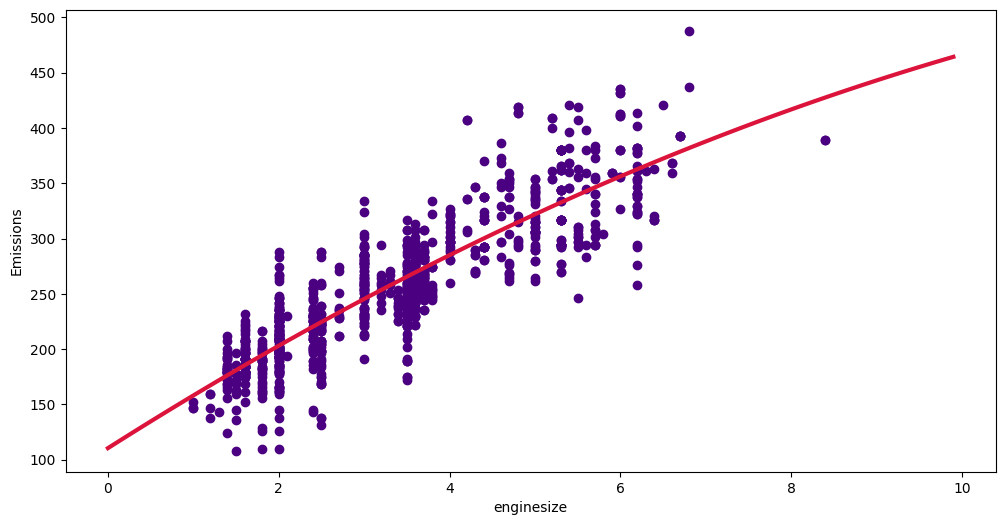

In [139]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS, color = 'indigo')
# Ne kadar çok data point koyarsak o kadar curve olur. Bunu ayarlayabilirz
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_ + clf.coef_[1]*XX + clf.coef_[2]*np.power(XX,2)
plt.plot(XX, yy, "crimson", linewidth =3)
plt.xlabel("enginesize")
plt.ylabel("Emissions")
plt.show()

In [140]:
print(XX)
print(yy)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]
[110.33698486 115.22283684 120.08196024 124.91435506 129.72002129
 134.49895895 139.25116802 143.97664852 148.67540043 153.34742376
 157.99271851 162.61128468 167.20312227 171.76823128 176.3066117
 180.81826355 185.30318681 189.7613815  194.1928476  198.59758512
 202.97559406 207.32687442 211.6514262  215.94924939 220.22034401
 224.46471004 228.6823475  232.87325637 237.03743666 241.17488837
 245.2856115  249.36960605 253.42687202 257.4574094  261.46121821
 265.43829843 269.38865008 273.31227314 277.20916762 281.07933352
 284.92277084 288.73947958 292.52945973 296.29271131 300.0292343
 

In [141]:
test_x_poly = poly.fit_transform(X_test)
pred = clf.predict(test_x_poly)


In [142]:
print(f'MAE = %.2f' % np.mean(abs(y_test - pred)))
print(f'MSE = %.2f' % np.mean(np.square(y_test - pred)))
print(f'RMSE = %.2f' % np.sqrt(np.mean((y_test - pred) ** 2)))
print(f"Training score: %.2f" % r2_score(y_test, pred))

MAE = 22.43
MSE = 839.03
RMSE = 28.97
Training score: 0.79


Try to use a polynomial regression with the dataset but this time with degree three (cubic). Does it result in better accuracy?

In [143]:
poly = PolynomialFeatures(degree=3)

In [144]:
train_x_poly_3 = poly.fit_transform(X_train)

In [145]:
model = clf.fit(train_x_poly_3,y_train)

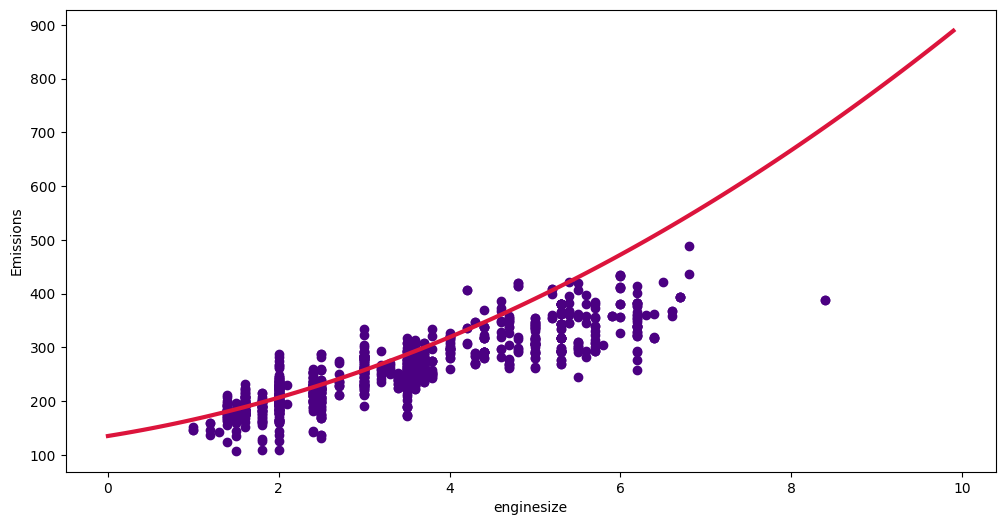

In [146]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS, color = 'indigo')
# Ne kadar çok data point koyarsak o kadar curve olur. Bunu ayarlayabilirz
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_ + clf.coef_[1]*XX + clf.coef_[2]*np.power(XX,2)
plt.plot(XX, yy, "crimson", linewidth =3)
plt.xlabel("enginesize")
plt.ylabel("Emissions")
plt.show()

In [147]:
test_x_poly_3 = poly.fit_transform(X_test)
pred = clf.predict(test_x_poly_3)


In [148]:
print(f'MAE = %.2f' % np.mean(abs(y_test - pred)))
print(f'MSE = %.2f' % np.mean(np.square(y_test - pred)))
print(f'RMSE = %.2f' % np.sqrt(np.mean((y_test - pred) ** 2)))
print(f"Training score: %.2f" % r2_score(y_test, pred))

MAE = 22.44
MSE = 840.92
RMSE = 29.00
Training score: 0.79
